In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
#PIL is Python Imaging Library
from PIL import Image,ImageOps
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random
import cv2 
%matplotlib inline

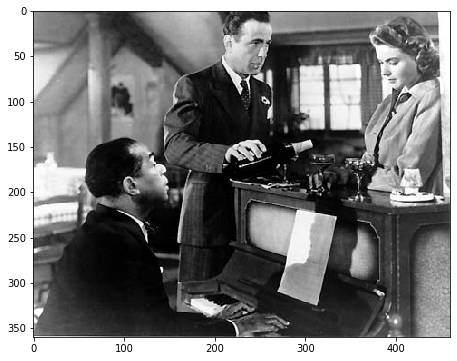

In [54]:
img = Image.open('casablanca.pgm')
plt.figure(figsize=(10,6))

plt.imshow(img,cmap = plt.cm.gray)

In [55]:
img.height,img.width

(360, 460)

In [56]:
image_matrix = np.array(img)
image_matrix.shape

(360, 460)

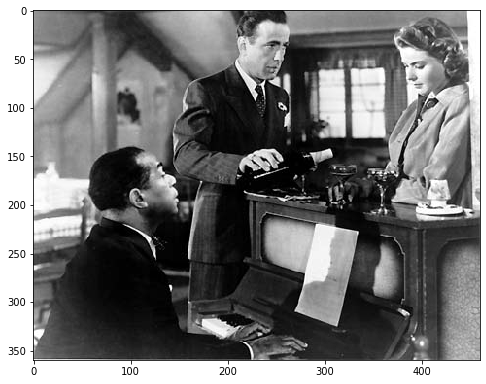

In [57]:
reconstructed_image = Image.fromarray(image_matrix)
plt.figure(figsize=(8,12))
plt.imshow(reconstructed_image,cmap = plt.cm.gray)

In [58]:
original_dimensions = image_matrix.shape
original_dimensions

(360, 460)

In [59]:
#Just for cross-checking things are the flattening the image
image_matrix[0,0],image_matrix[123,124],image_matrix[123,124]

(163, 129, 129)

In [60]:
pct_reduction = 0.10
reduced_pixel  = int( pct_reduction* original_dimensions[1])

#Applying PCA
pca = PCA(n_components=reduced_pixel)
pca.fit(image_matrix)

#Transforming the input matrix
X_transformed = pca.transform(image_matrix)
print("Original Input dimesnions {}".format(original_dimensions))
print("New Reduced dimensions {}".format(X_transformed.shape))

Original Input dimesnions (360, 460)
New Reduced dimensions (360, 46)


In [61]:
df_pca = pd.DataFrame(data = X_transformed,columns=list(range(X_transformed.shape[1])))

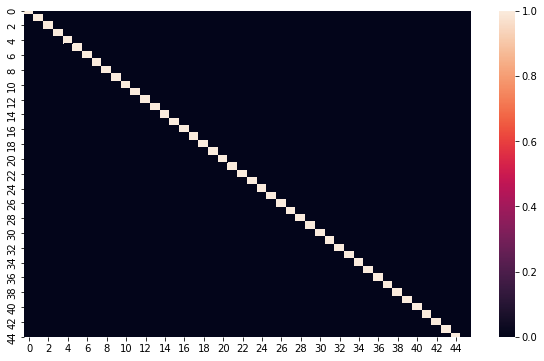

In [62]:
figure = plt.figure(figsize=(10,6))
corrMatrix = df_pca.corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

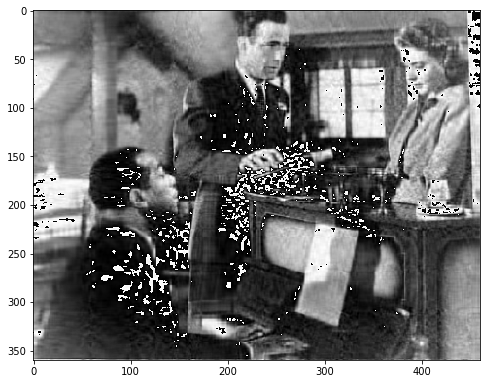

In [63]:
reconstructed_matrix = pca.inverse_transform(X_transformed)
reconstructed_image_pca = Image.fromarray(np.uint8(reconstructed_matrix))
plt.figure(figsize=(8,12))
plt.imshow(reconstructed_image_pca,cmap = plt.cm.gray)

In [64]:
def my_rmse(np_arr1,np_arr2):
    dim = np_arr1.shape
    tot_loss = 0
    for i in range(dim[0]):
        for j in range(dim[1]):
            tot_loss += math.pow((np_arr1[i,j] - np_arr2[i,j]),2)
    return round(math.sqrt(tot_loss/(dim[0]* dim[1]*1.0)),2)

In [65]:
error_pca = my_rmse(image_matrix,reconstructed_matrix)
error_pca

11.84

## Auto Encoder 

In [66]:
X_org = image_matrix.copy()
sc = StandardScaler()
X = sc.fit_transform(X_org)

In [73]:

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# this is the size of our encoded representations
encoding_dim = reduced_pixel  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(img.width,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='linear')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(img.width, activation=None)(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [82]:
#Encoder
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [83]:
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [84]:
autoencoder.fit(X, X,epochs=500,batch_size=16,shuffle=True)

Epoch 1/500
23/23 [==============================] - 0s 2ms/step - loss: 0.7690
Epoch 2/500
23/23 [==============================] - 0s 2ms/step - loss: 0.7684
Epoch 3/500
23/23 [==============================] - 0s 2ms/step - loss: 0.7677
Epoch 4/500
23/23 [==============================] - 0s 2ms/step - loss: 0.7670
Epoch 5/500
23/23 [==============================] - 0s 2ms/step - loss: 0.7664
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 0.7657
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 0.7650
Epoch 8/500
23/23 [==============================] - 0s 2ms/step - loss: 0.7643
Epoch 9/500
23/23 [==============================] - 0s 3ms/step - loss: 0.7636
Epoch 10/500
23/23 [==============================] - 0s 2ms/step - loss: 0.7630
Epoch 11/500
23/23 [==============================] - 0s 2ms/step - loss: 0.7623
Epoch 12/500
23/23 [==============================] - 0s 2ms/step - loss: 0.7616
Epoch 13/500
23/23 [=================

23/23 [==============================] - 0s 1ms/step - loss: 0.6985
Epoch 103/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6979
Epoch 104/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6972
Epoch 105/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6965
Epoch 106/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6959
Epoch 107/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6952
Epoch 108/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6945
Epoch 109/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6939
Epoch 110/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 111/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6925
Epoch 112/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6919
Epoch 113/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6912
Epoch 114/500
23/23 [=========

23/23 [==============================] - 0s 2ms/step - loss: 0.6364
Epoch 203/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6359
Epoch 204/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6353
Epoch 205/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6347
Epoch 206/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6341
Epoch 207/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6336
Epoch 208/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6330
Epoch 209/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6324
Epoch 210/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6319
Epoch 211/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6313
Epoch 212/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6307
Epoch 213/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6302
Epoch 214/500
23/23 [=========

23/23 [==============================] - 0s 2ms/step - loss: 0.5836
Epoch 303/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5831
Epoch 304/500
23/23 [==============================] - 0s 3ms/step - loss: 0.5826
Epoch 305/500
23/23 [==============================] - 0s 3ms/step - loss: 0.5822
Epoch 306/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5817
Epoch 307/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5812
Epoch 308/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5807
Epoch 309/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5802
Epoch 310/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5797
Epoch 311/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5793
Epoch 312/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5788
Epoch 313/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5783
Epoch 314/500
23/23 [=========

23/23 [==============================] - 0s 2ms/step - loss: 0.5391
Epoch 402/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5387
Epoch 403/500
23/23 [==============================] - 0s 6ms/step - loss: 0.5382
Epoch 404/500
23/23 [==============================] - 0s 6ms/step - loss: 0.5378
Epoch 405/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5374
Epoch 406/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5370
Epoch 407/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5366
Epoch 408/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5362
Epoch 409/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5358
Epoch 410/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5354
Epoch 411/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5350
Epoch 412/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5345
Epoch 413/500
23/23 [=========

In [76]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 460)]             0         
_________________________________________________________________
dense (Dense)                (None, 46)                21206     
_________________________________________________________________
dense_1 (Dense)              (None, 460)               21620     
Total params: 42,826
Trainable params: 42,826
Non-trainable params: 0
_________________________________________________________________


In [85]:
res = autoencoder.predict(X)

In [86]:
encoded_imgs = encoder.predict(X)
decoded_imgs = decoder.predict(encoded_imgs)

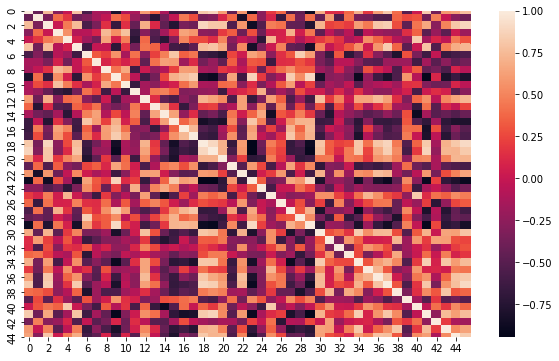

In [87]:
df_ae = pd.DataFrame(data = encoded_imgs,columns=list(range(encoded_imgs.shape[1])))
figure = plt.figure(figsize=(10,6))
corrMatrix = df_ae.corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

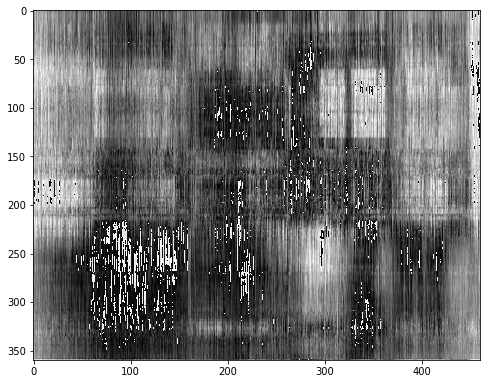

In [88]:
X_decoded_ae = sc.inverse_transform(decoded_imgs)

reconstructed_image_ae = Image.fromarray(np.uint8(X_decoded_ae))
plt.figure(figsize=(8,12))
plt.imshow(reconstructed_image_ae,cmap = plt.cm.gray)

In [89]:
error_ae = my_rmse(image_matrix,X_decoded_ae)
error_ae

45.72

In [90]:
input_img = Input(shape=(img.width,))
encoded1 = Dense(128, activation='relu')(input_img)
encoded2 = Dense(reduced_pixel, activation='relu')(encoded1)
decoded1 = Dense(128, activation='relu')(encoded2)
decoded2 = Dense(img.width, activation=None)(decoded1)

In [91]:
autoencoder = Model(input_img, decoded2)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [92]:
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 460)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               59008     
_________________________________________________________________
dense_3 (Dense)              (None, 46)                5934      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               6016      
_________________________________________________________________
dense_5 (Dense)              (None, 460)               59340     
Total params: 130,298
Trainable params: 130,298
Non-trainable params: 0
_________________________________________________________________


In [93]:
autoencoder.fit(X,X,
                epochs=500,
                batch_size=16,
                shuffle=True)

Epoch 1/500
23/23 [==============================] - 0s 3ms/step - loss: 1.0561
Epoch 2/500
23/23 [==============================] - 0s 4ms/step - loss: 1.0553
Epoch 3/500
23/23 [==============================] - 0s 4ms/step - loss: 1.0545
Epoch 4/500
23/23 [==============================] - 0s 4ms/step - loss: 1.0537
Epoch 5/500
23/23 [==============================] - 0s 3ms/step - loss: 1.0529
Epoch 6/500
23/23 [==============================] - 0s 4ms/step - loss: 1.0521
Epoch 7/500
23/23 [==============================] - 0s 9ms/step - loss: 1.0513
Epoch 8/500
23/23 [==============================] - 0s 5ms/step - loss: 1.0506
Epoch 9/500
23/23 [==============================] - 0s 5ms/step - loss: 1.0498A: 0s - loss: 1.047
Epoch 10/500
23/23 [==============================] - 0s 4ms/step - loss: 1.0491
Epoch 11/500
23/23 [==============================] - 0s 3ms/step - loss: 1.0483
Epoch 12/500
23/23 [==============================] - 0s 3ms/step - loss: 1.0476
Epoch 13/500
23/23

23/23 [==============================] - 0s 3ms/step - loss: 1.0064
Epoch 102/500
23/23 [==============================] - 0s 3ms/step - loss: 1.0061
Epoch 103/500
23/23 [==============================] - 0s 3ms/step - loss: 1.0058
Epoch 104/500
23/23 [==============================] - 0s 3ms/step - loss: 1.0055
Epoch 105/500
23/23 [==============================] - 0s 3ms/step - loss: 1.0052
Epoch 106/500
23/23 [==============================] - 0s 3ms/step - loss: 1.0049
Epoch 107/500
23/23 [==============================] - 0s 3ms/step - loss: 1.0046
Epoch 108/500
23/23 [==============================] - 0s 3ms/step - loss: 1.0043
Epoch 109/500
23/23 [==============================] - 0s 3ms/step - loss: 1.0041
Epoch 110/500
23/23 [==============================] - 0s 3ms/step - loss: 1.0038
Epoch 111/500
23/23 [==============================] - 0s 7ms/step - loss: 1.0035
Epoch 112/500
23/23 [==============================] - 0s 3ms/step - loss: 1.0032
Epoch 113/500
23/23 [=========

23/23 [==============================] - 0s 3ms/step - loss: 0.9828
Epoch 202/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9826
Epoch 203/500
23/23 [==============================] - 0s 2ms/step - loss: 0.9823
Epoch 204/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9821
Epoch 205/500
23/23 [==============================] - 0s 2ms/step - loss: 0.9819
Epoch 206/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9817
Epoch 207/500
23/23 [==============================] - 0s 2ms/step - loss: 0.9815
Epoch 208/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9813
Epoch 209/500
23/23 [==============================] - 0s 2ms/step - loss: 0.9811
Epoch 210/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9809
Epoch 211/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9807
Epoch 212/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9805
Epoch 213/500
23/23 [=========

23/23 [==============================] - 0s 2ms/step - loss: 0.9605
Epoch 302/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9602
Epoch 303/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9600
Epoch 304/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9597
Epoch 305/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9595
Epoch 306/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9592
Epoch 307/500
23/23 [==============================] - 0s 2ms/step - loss: 0.9590
Epoch 308/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9587
Epoch 309/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9585
Epoch 310/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9582
Epoch 311/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9580
Epoch 312/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9577
Epoch 313/500
23/23 [=========

23/23 [==============================] - 0s 3ms/step - loss: 0.9321
Epoch 402/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9318
Epoch 403/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9314
Epoch 404/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9311
Epoch 405/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9308
Epoch 406/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9304
Epoch 407/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9301
Epoch 408/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9298
Epoch 409/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9294
Epoch 410/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9291
Epoch 411/500
23/23 [==============================] - 0s 4ms/step - loss: 0.9288
Epoch 412/500
23/23 [==============================] - 0s 4ms/step - loss: 0.9284
Epoch 413/500
23/23 [=========

In [94]:
#Encoder
encoder = Model(input_img, encoded2)
#Decoder
decoder = Model(input_img, decoded2)

In [95]:
encoded_imgs[0].shape

(46,)

In [96]:
decoded_imgs[0].shape

(460,)

In [97]:
X_decoded_deep_ae = sc.inverse_transform(decoded_imgs)

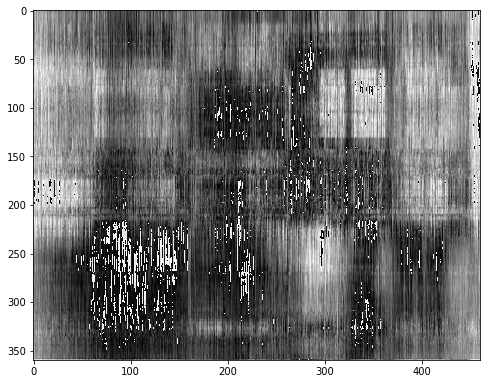

In [98]:
reconstructed_image_deep_ae = Image.fromarray(np.uint8(X_decoded_deep_ae))
plt.figure(figsize=(8,12))
plt.imshow(reconstructed_image_deep_ae,cmap = plt.cm.gray)

In [99]:
error_dae = my_rmse(image_matrix,X_decoded_deep_ae)
error_dae

45.72

In [100]:
gain = (error_pca - error_dae)/error_pca * 100
print("Gain percent {}".format(round(gain,2)))

Gain percent -286.15
